# 함수형 API (Functional API)

## <span style="font-size:25px">모델 구축 - Sequential API vs Functional API</span>

<dl>
<dt style="font-size:20px">▶ Functional API 모델의 필요성</dt>
<dd style="font size:18px">
- 지금까지 사용해왔던 Sequential API 방식은 입력부터 출력까지 일직선으로 연결되어 있어 
<br>&ensp;직관적이고 편리한 장점이 있으나, 여러 개의 층을 공유하거나 다양한 종류의 입력과 출력
<br>&ensp;을 사용해서 복잡한 모델을 만드는 일에는, 일직선 구조로 인해 한계가 있음
</dd>
<br>
<dd>
- Sequential API와 Functional API 과정은 똑같음
</dd>
</dl>

<img src="picture/TF_img_24_1.png" alt="TF_img_24_1" width=750>

## <span style="font-size:25px">Functional API 모델 구축</span>

<table>
<tr>
<td>Sequential API 모델</td>
<td>Functional API 모델</td>
</tr>

<tr>
<td>
<span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>tensorflow</span> <span style='color:#DA70FF'>as</span> <span style='color:#23C5A2'>tf</span>

<span style='color:#DA70FF'>from</span> <span style='color:#23C5A2'>tensorflow.keras.models</span> <span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>Sequential</span>
<br><span style='color:#DA70FF'>from</span> <span style='color:#23C5A2'>tensorflow.keras.layers</span> <span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>Dense</span>

model = Sequential()

model.add(Dense(<span style='color:#99FEA0'>8</span>, activation='relu', input_shape(<span style='color:#99FEA0'>4</span>,)))
<br>model.add(Dense(<span style='color:#99FEA0'>16</span>, activation='relu'))
<br>model.add(Dense(<span style='color:#99FEA0'>32</span>, activation='relu'))

model.add(Dense(<span style='color:#99FEA0'>10</span>, activation='softmax'))

model.summary()
</td>
<td><br>
<span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>tensorflow</span> <span style='color:#DA70FF'>as</span> <span style='color:#23C5A2'>tf</span>

<span style='color:#DA70FF'>from</span> <span style='color:#23C5A2'>tensorflow.keras.models</span> <span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>Model</span>
<br><span style='color:#DA70FF'>from</span> <span style='color:#23C5A2'>tensorflow.keras.layers</span> <span style='color:#DA70FF'>import</span> <span style='color:#23C5A2'>input, Dense</span>

input_ = input(shape=(<span style='color:#99FEA0'>4</span>,))

x = Dense(<span style='color:#99FEA0'>8</span>, activation='relu')(input_)
<br>x = Dense(<span style='color:#99FEA0'>16</span>, activation='relu')(x)
<br>x = Dense(<span style='color:#99FEA0'>32</span>, activation='relu')(x)

output_ = Dense(<span style='color:#99FEA0'>10</span>, activation='softmax')(x)

model = Model(inputs=input_, outputs=output_)

model.summary()
</td>
</tr>

## <span style="font-size:25px">다중 입력에 대한 Functional API 모델 구축 예시</span>

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, concatenate

# 입력층 1에 대한 신경망
input_1 = Input(shape=(4,))

hidden_1 = Dense(8, activation='relu')(input_1)
hidden_2 = Dense(16, activation='relu')(hidden_1)

output_1 = Model(inputs=input_1, outputs=hidden_2)

# 입력층 2에 대한 신경망
input_2 = Input(shape=(8,))

hidden_3 = Dense(8, activation='relu')(input_2)

output_2 = Model(inputs=input_2, outputs=hidden_3)

# 층 연결
result = concatenate([output_1.output, output_2.output])

# 출력층 정의
output_ = Dense(10, activation='softmax')(result)

# 최종 모델 구축
model = Model(inputs=[output_1.input, output_2.input], outputs=output_)

model.summary()

Model: "model_9"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 4)]          0           []                               
                                                                                                  
 dense_15 (Dense)               (None, 8)            40          ['input_10[0][0]']               
                                                                                                  
 input_11 (InputLayer)          [(None, 8)]          0           []                               
                                                                                                  
 dense_16 (Dense)               (None, 16)           144         ['dense_15[0][0]']               
                                                                                            

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist

(x_train, t_train), (x_test, t_test) = mnist.load_data()

x_train, x_test = x_train.reshape(-1, 28, 28, 1), x_test.reshape(-1, 28, 28 ,1)

print(x_train.shape, x_test.shape), print(t_train.shape, t_test.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [12]:
input_ = Input(shape=(28, 28, 1))

x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(32, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

output_ = Dense(10, activation='softmax')(x)

cnn = Model(inputs=input_, outputs=output_)

In [13]:
cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist = cnn.fit(x_train, t_train, batch_size=128, epochs=30, validation_data=(x_test, t_test))

Epoch 1/30
469/469 [==============================] - 17s 7ms/step - loss: 0.2761 - accuracy: 0.9156 - val_loss: 0.0686 - val_accuracy: 0.9780
Epoch 2/30
469/469 [==============================] - 3s 6ms/step - loss: 0.1018 - accuracy: 0.9693 - val_loss: 0.0433 - val_accuracy: 0.9853
Epoch 3/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0756 - accuracy: 0.9773 - val_loss: 0.0422 - val_accuracy: 0.9867
Epoch 4/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0610 - accuracy: 0.9814 - val_loss: 0.0368 - val_accuracy: 0.9874
Epoch 5/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0526 - accuracy: 0.9837 - val_loss: 0.0315 - val_accuracy: 0.9895
Epoch 6/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0481 - accuracy: 0.9853 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 7/30
469/469 [==============================] - 3s 6ms/step - loss: 0.0420 - accuracy: 0.9866 - val_loss: 0.0316 - val_accuracy: 0.9889
Epoch

In [16]:
cnn.evaluate(x_test, t_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9919


[0.03490452468395233, 0.9919000267982483]

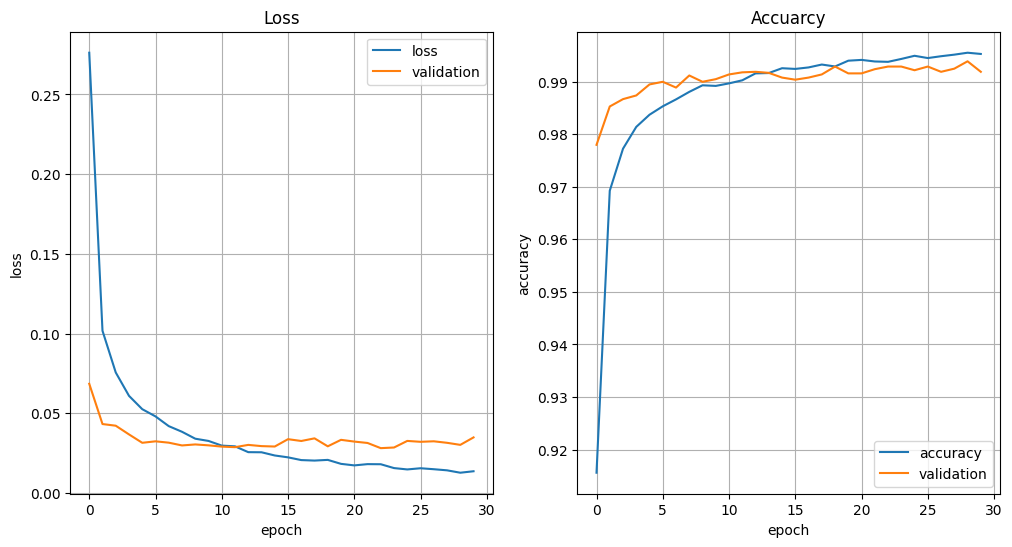

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'validation'], loc='best')
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Accuarcy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['accuracy', 'validation'], loc='best')
plt.grid()

plt.show()

## <span style="font-size:25px">Functional API 사용시 혼동하는 경우</span>

<dl>
<dt style="font-size:20px">▶ Functional API 모델에서 동일한 의미를 갖지만, 1 line으로 표현할 수 있는 코드를 2 line으로 
<br>　 표현한 경우에 있어 일반 함수를 호출하는 경우로 혼동할 수 있음</dt>
</dl>

In [18]:
input_ = Input(shape=(28, 28, 1))

# 동일 코드 | == x = Conv2D(32, 3, activation='relu')(input_)
x = Conv2D(32, 3, activation='relu')
x = x(input_)

x = Conv2D(64, 3, activation='relu')(x)
x = MaxPool2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)

x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)

# 동일 코드 | == output_ = Dense(10, activation='softmax')(x)
output_ = Dense(10, activation='softmax')
output_ = output_(x)

cnn = Model(inputs=input_, outputs=output_)